<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>




## An unrolled recurrent neural network.


<img src='http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png'>

This chain-like nature reveals that recurrent neural networks are intimately related to sequences and lists. 
They’re the natural architecture of neural network to use for such data. In the last few years, there have been incredible success applying RNNs to a variety of problems: speech recognition, language modeling, translation, image captioning. 

## Long Short-Term Memory Network
The Long Short-Term Memory network, or LSTM network, is a recurrent neural network that is trained using 
Backpropagation Through Time and overcomes the vanishing gradient problem.
As such, it can be used to create large recurrent networks that in turn can be used to address difficult 
sequence problems in machine learning and achieve state-of-the-art results.
Instead of neurons, LSTM networks have memory blocks that are connected through layers.
A block has components that make it smarter than a classical neuron and a memory for recent sequences. 
A block contains gates that manage the block’s state and output. A block operates upon an input sequence
and each gate within a block uses the sigmoid activation units to control whether they are triggered or not, 
making the change of state and addition of information flowing through the block conditional.

In [1]:
# First step, import libraries.
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import os
import plotly.graph_objs as go
import numpy as np
import plotly.offline as py
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

### import dataset etc... 
### this data set has so many missing values and errors. this is not the PERFECT dataset to work on.. 


In [2]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

In [3]:
df.head()

Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
2  1325318040   NaN   NaN   NaN    NaN           NaN                NaN   
3  1325318100   NaN   NaN   NaN    NaN           NaN                NaN   
4  1325318160   NaN   NaN   NaN    NaN           NaN                NaN   

   Weighted_Price        date  
0            4.39  2011-12-31  
1             NaN  2011-12-31  
2             NaN  2011-12-31  
3             NaN  2011-12-31  
4             NaN  2011-12-31

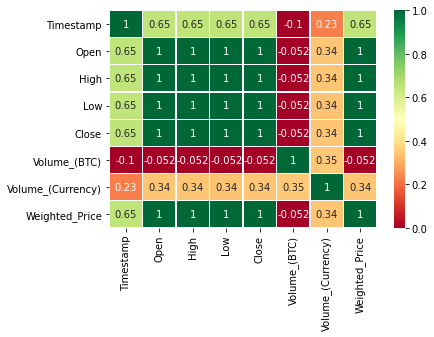

In [4]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)
plt.show()


Alert! from autoviz version 0.1.35, after importing, you must %matplotlib inline to display charts in Jupyter Notebooks.
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not display plots but saves them in AutoViz_Plots folder in local machine.
Updated: chart_format='bokeh' generates and displays charts in your local Jupyter notebook.
      chart_format='server' generates and displays charts in the browser - one tab for each chart.
      chart_format='html' silently saves charts HTML format - they are also interactive!


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
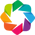

    max_rows_analyzed is smaller than dataset shape 4857377...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 8)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    8 Predictors classified...
        1 variables removed since they were ID or low-information variables
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...
Number of All Scatter Plots = 28
No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz = 17 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


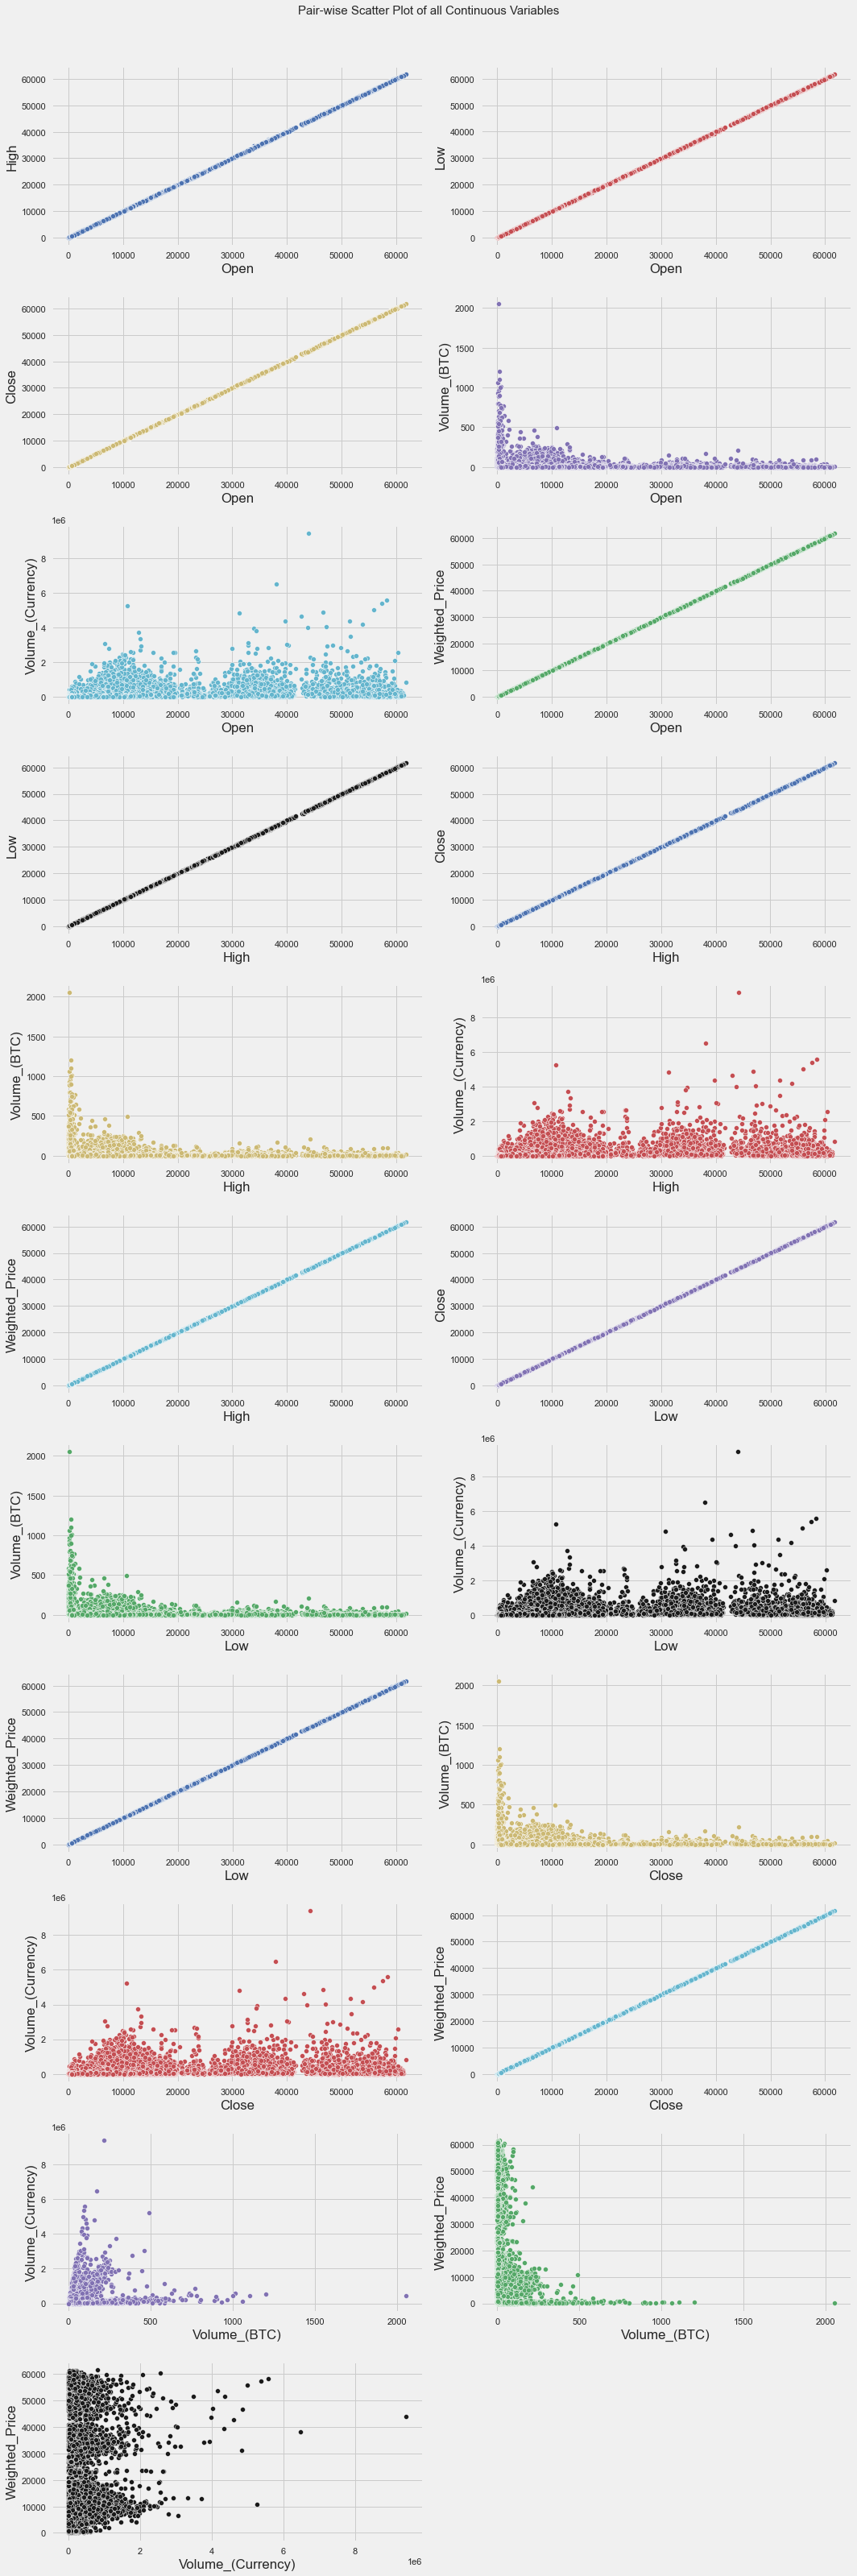

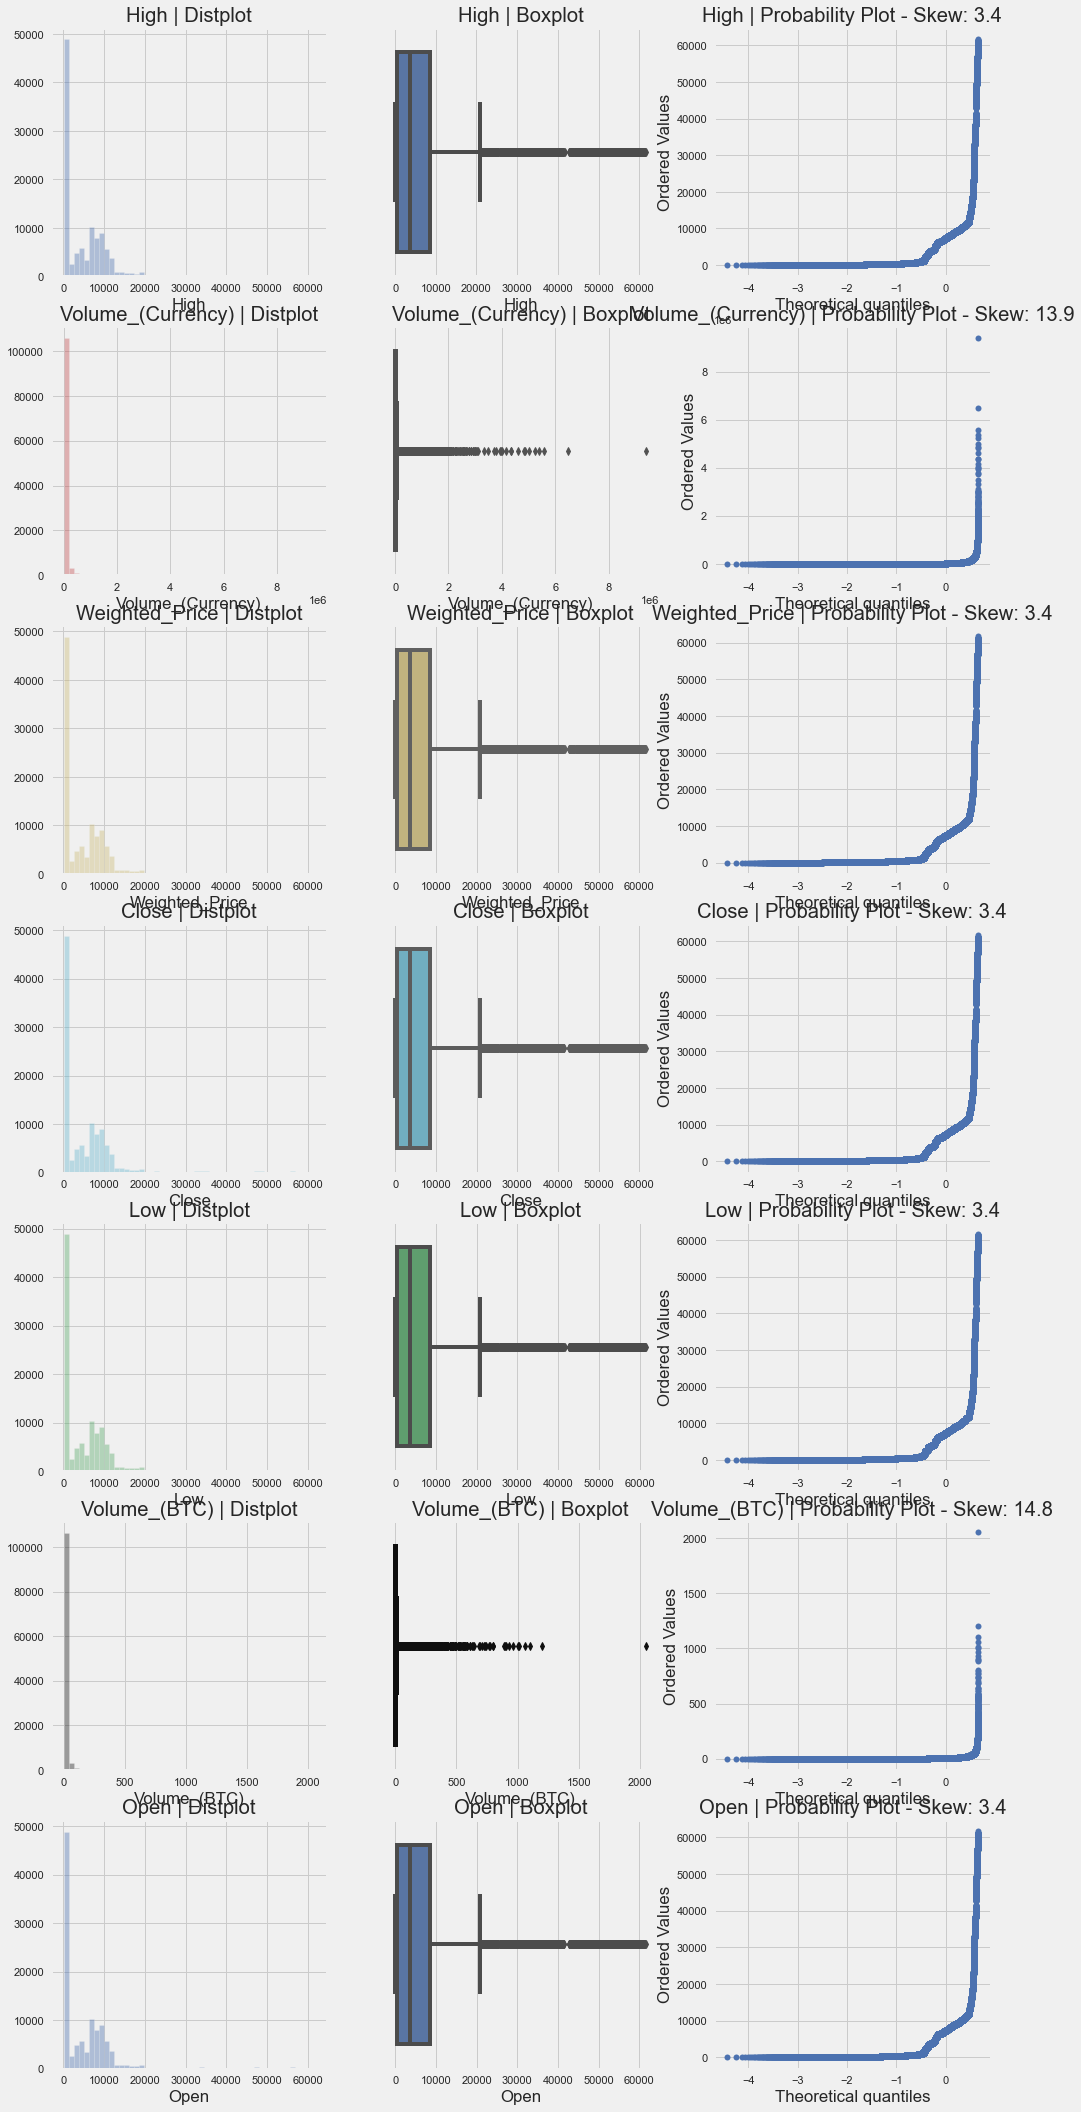

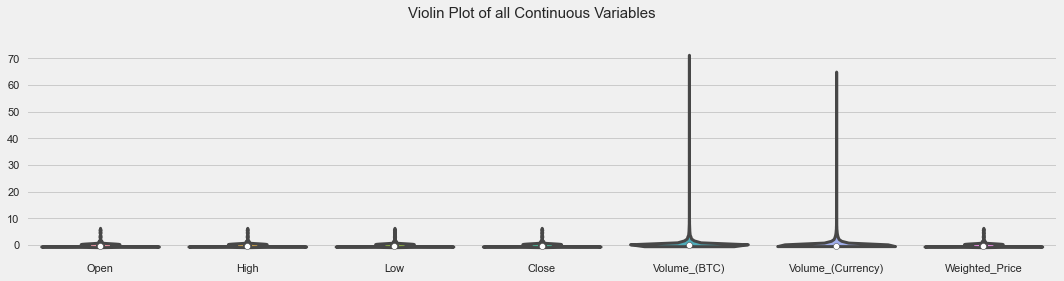

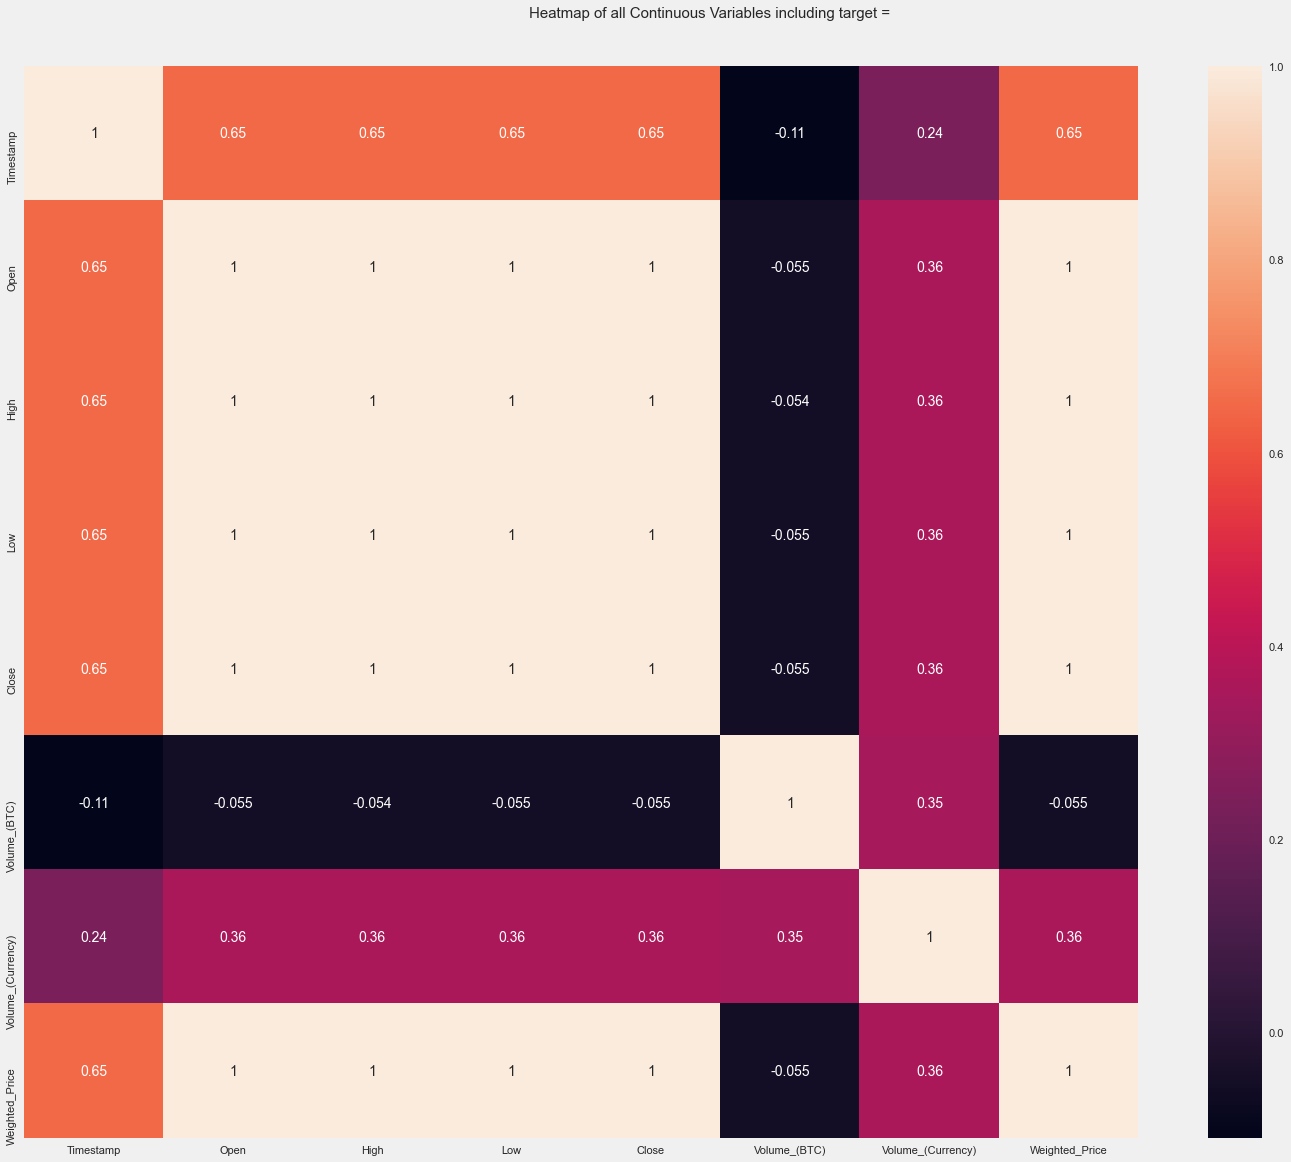

In [5]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

Observation: Volume is corrlerated to Weighted Price. 
    Open, High, Low, Close are directly related to Weighted Price

In [6]:
Real_Price.head()

date
2011-12-31    4.471603
2012-01-01    4.806667
2012-01-02    5.000000
2012-01-03    5.252500
2012-01-04    5.208159
Name: Weighted_Price, dtype: float64

Extrating the data of last 30 days as the test set

In [7]:
# split data
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

In [8]:
len(df_train)

3346

In [9]:
len(df_test)

30

In [10]:
df_train.head()

date
2011-12-31    4.471603
2012-01-01    4.806667
2012-01-02    5.000000
2012-01-03    5.252500
2012-01-04    5.208159
Name: Weighted_Price, dtype: float64

# Data Preprocessing



Feature scaling data to prepare input for Keras ( I always believe its name should be lasagna, cause it has got layers)  

For an LSTM layer, you need the shape like (NumberOfExamples, TimeSteps, FeaturesPerStep).

Passing the tuple through np.reshape where np.reshape(a, newshape, order='C')
a-array to be reshaped
newshape= length of final set
order='C'-  C-like index ordering, in this case its 1 array

The order keyword gives the index ordering both for fetching the values from a,
and then placing the values into the output array. 
For example, let’s say you have an array:
* a = np.arange(6).reshape((3, 2))
* a
* Result will be :

array([[0, 1],
       [2, 3],
       [4, 5]])

In [11]:
# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
training_set

array([[4.47160287e+00],
       [4.80666667e+00],
       [5.00000000e+00],
       ...,
       [4.71302081e+04],
       [4.48184476e+04],
       [4.76415369e+04]])

In [12]:
type(training_set)

numpy.ndarray

As numpy has floting point value, no need of conversion. Othervise, ints are converted to floats because 
NN work better with them

## Scaling feature to a range: MinMaxScaler

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing.


In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))


X_train=t and y_train=t+1 pattern in the numbers. 

In [14]:
y_train

array([[8.32800133e-06],
       [1.17176440e-05],
       [1.61446342e-05],
       ...,
       [8.26240760e-01],
       [7.85709509e-01],
       [8.35205702e-01]])

In [15]:
X_train

array([[[2.45345037e-06]],

       [[8.32800133e-06]],

       [[1.17176440e-05]],

       ...,

       [[8.17925242e-01]],

       [[8.26240760e-01]],

       [[7.85709509e-01]]])

In [16]:
len(X_train)

3345

In [17]:
len(y_train)

3345

The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons,
and an output layer that makes a single value prediction. The default sigmoid activation function is
used for the LSTM blocks. The network is trained for 100 epochs and a batch size of 1 is used.

thats why it will be fast.. try to change these vlaues to get a better result.. 

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()


model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))



model.add(Dense(units = 1))


model.compile(optimizer = 'adam', loss = 'mse')


model.fit(X_train, y_train, batch_size = 5, epochs = 100)


Epoch 1/100
669/669 [==============================] - 1s 1ms/step - loss: 0.0230
Epoch 2/100
669/669 [==============================] - 1s 1ms/step - loss: 0.0093
Epoch 3/100
669/669 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 4/100
669/669 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 5/100
669/669 [==============================] - 1s 1ms/step - loss: 0.0018
Epoch 6/100
669/669 [==============================] - 1s 1ms/step - loss: 5.5043e-04
Epoch 7/100
669/669 [==============================] - 1s 1ms/step - loss: 1.4004e-04
Epoch 8/100
669/669 [==============================] - 1s 1ms/step - loss: 7.0184e-05
Epoch 9/100
669/669 [==============================] - 1s 1ms/step - loss: 6.2660e-05A: 0s - loss: 7
Epoch 10/100
669/669 [==============================] - 1s 1ms/step - loss: 5.9031e-05
Epoch 11/100
669/669 [==============================] - 1s 1ms/step - loss: 5.5657e-05
Epoch 12/100
669/669 [==============================] - 1

In [19]:
history = model.fit(X_train, y_train, epochs=300, batch_size=100, validation_data=(X_train, y_train), verbose=0, shuffle=False)


Plot line graph to show amount loss according the the epoch


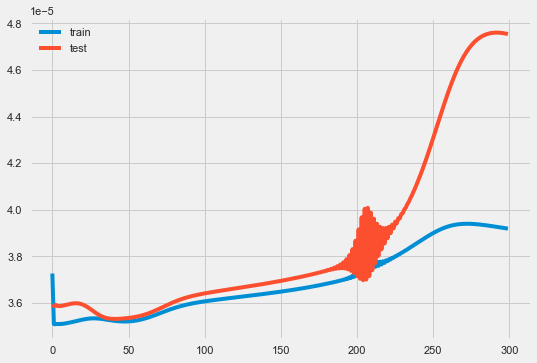

In [20]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

* **Prediction**

Notice that I only predict the price of the next day using the price today. Since there must be a lot of influence factors and it must have a lot of error when you predict a longer time.

### Transforming the test doing Reshape and then normalization.

Just the way input ata is transformed, output is tansformed to predict

In [22]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = model.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)


In [23]:
len(test_set)

30

In [24]:
test_set

array([48617.2893209 , 50429.44901579, 49398.25039857, 47717.64330028,
       48371.54353797, 50218.21680438, 50798.35421241, 53980.84726168,
       55375.36624126, 56272.59697201, 56826.56003305, 58802.60156771,
       60455.84483149, 57507.73450911, 55339.80479183, 56158.01731986,
       58472.11732156, 58283.54799433, 58779.76938656, 57312.59853646,
       56787.14842211, 54703.38774047, 55123.99385492, 52121.6841103 ,
       53241.03748851, 55193.35725956, 55832.95882391, 56913.99381926,
       58346.9122683 , 58764.349363  ])

In [25]:
predicted_BTC_price

array([[48590.08 ],
       [50194.117],
       [49285.36 ],
       [47781.734],
       [48370.055],
       [50008.84 ],
       [50516.605],
       [53239.84 ],
       [54399.043],
       [55133.61 ],
       [55582.695],
       [57156.68 ],
       [58439.605],
       [56130.227],
       [54369.74 ],
       [55040.297],
       [56896.5  ],
       [56747.5  ],
       [57138.742],
       [55973.906],
       [55550.855],
       [53843.1  ],
       [54191.652],
       [51661.89 ],
       [52616.34 ],
       [54248.94 ],
       [54774.777],
       [55653.266],
       [56797.613],
       [57126.625]], dtype=float32)

In [26]:
X_train

array([[[2.45345037e-06]],

       [[8.32800133e-06]],

       [[1.17176440e-05]],

       ...,

       [[8.17925242e-01]],

       [[8.26240760e-01]],

       [[7.85709509e-01]]])

# Visualising
Plot the predicted price and the real price. Compare the diference. The difference is larger when the time is further to the training set. That is why I only want to predict the price of one month

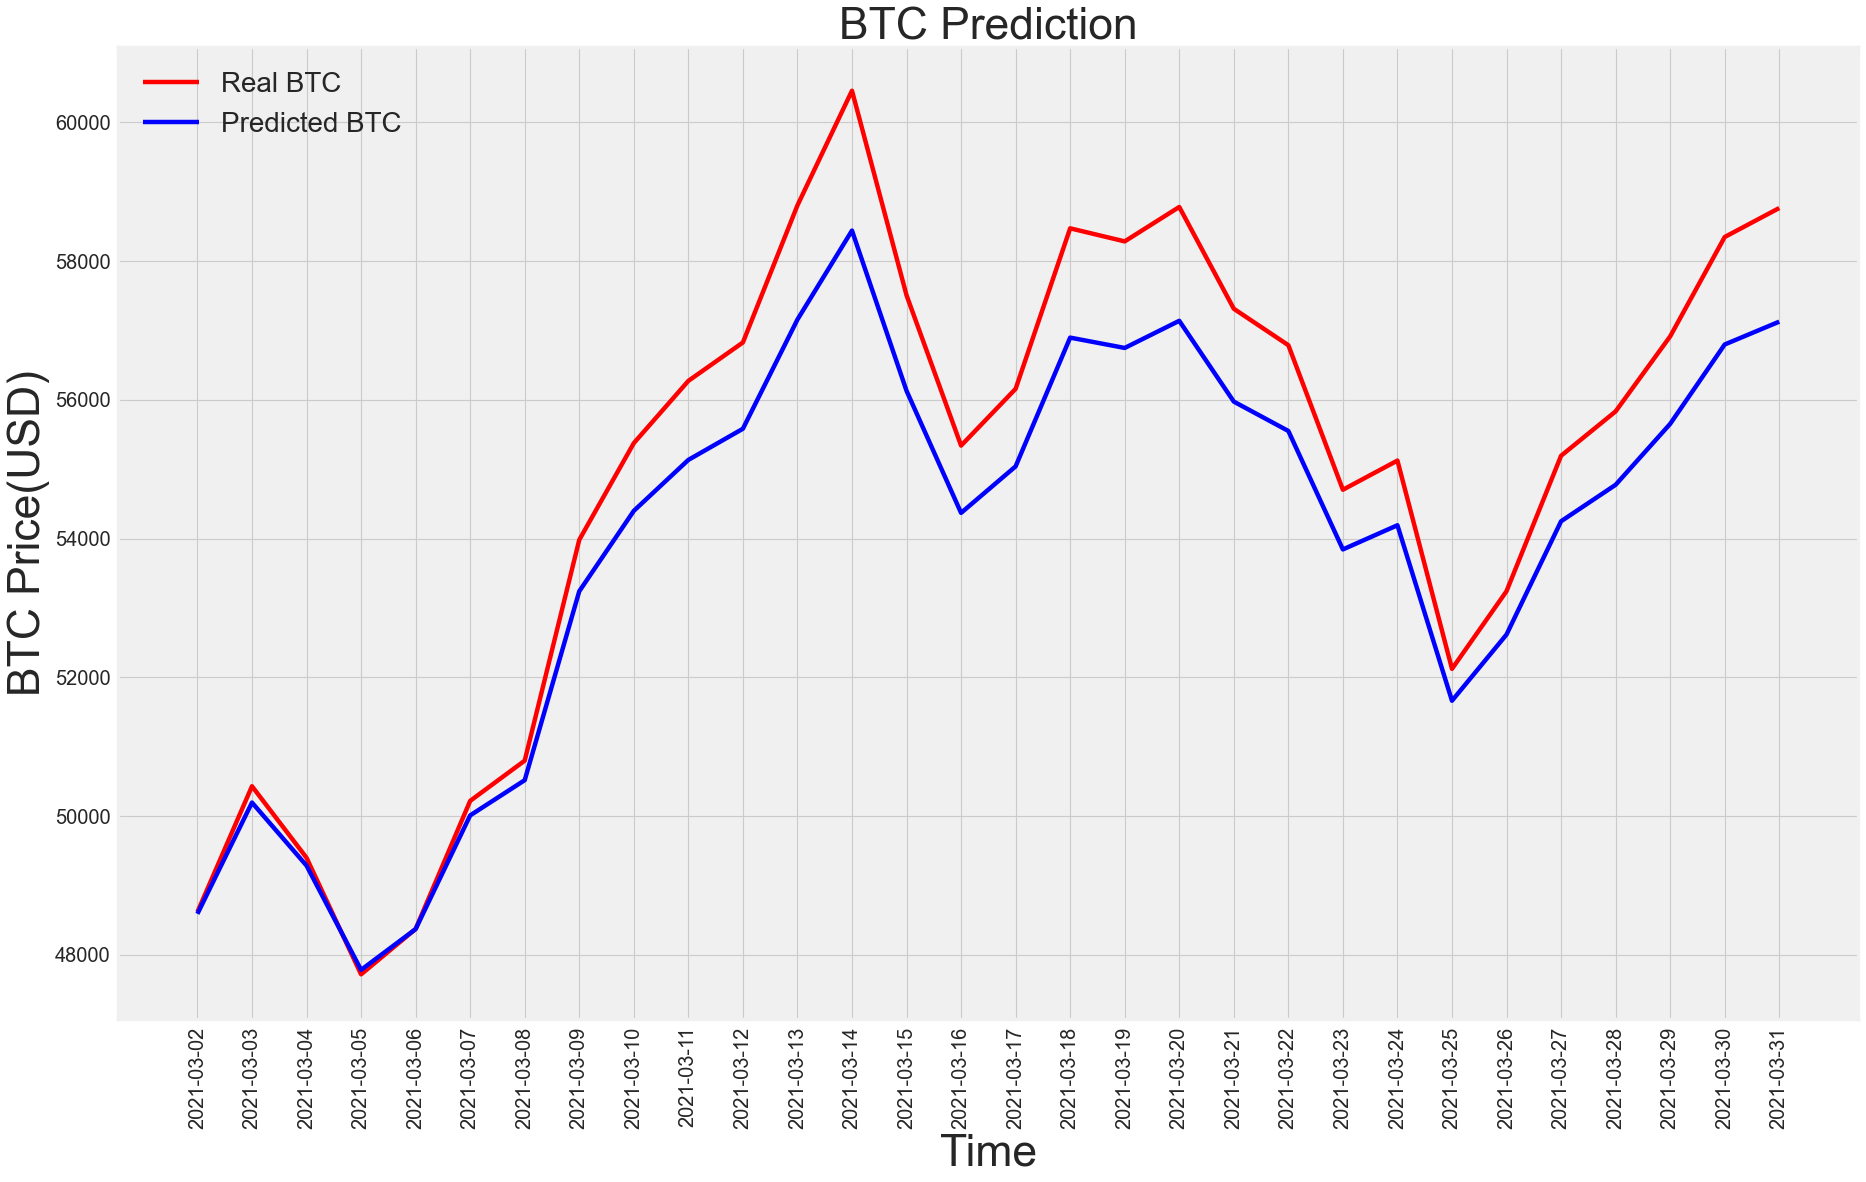

In [27]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC')
plt.title('BTC Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()